***
# <font color=navy size=9>Regressão Linear</font>
***

## Dados para regressão
Inicialmente iremos importar os dados para realizar a regressão linear.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dados.csv')

Exibindo os 5 primeiros dados:

In [3]:
df.head()

,X,Y
0,0.0,0.496714
1,0.1,0.061736
2,0.2,1.047689
3,0.3,2.123030
4,0.4,0.565847


Exibindo os 5 últimos dados:

In [4]:
df.tail()

,X,Y
95,9.5,17.536485
96,9.6,19.496120
97,9.7,19.661055
98,9.8,19.605113
99,9.9,19.565413


Iremos plotar um gráfico de dispersão para verificar o comportamento dos dados.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0.98, 'Visualização dos Dados')

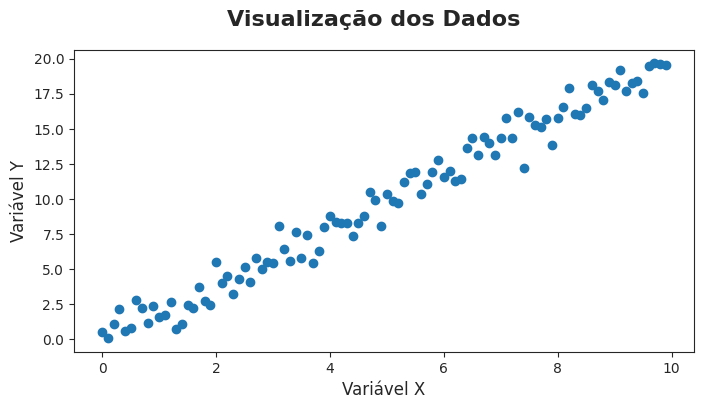

In [6]:
sns.set_style('ticks')
plt.figure(figsize = (8, 4), dpi = 100)
plt.scatter(df['X'], df['Y'])
plt.xlabel('Variável X', size = 12)
plt.ylabel('Variável Y', size = 12)
plt.suptitle('Visualização dos Dados', fontweight='bold', size = 16)

Como se trata de regressão linear a equação utilizada é a seguinte:

##### $$\,Y = A\,X\,+\, B$$

Então iremos realizar a regressão para $Y$ e $X$.

Para realizar a regressão é necessário definir as variáveis.

In [7]:
X = df['X'].values
Y = df['Y'].values

Nesta etapa iremos realizar a regressão linear. O método usado é o de Mínimos Quadrados.

In [ ]:
import statsmodels.api as sm

In [9]:
X_reg = sm.add_constant(X)
model = sm.OLS(Y, X_reg, missing = 'drop').fit()

Agora iremos salvar os resultados.

In [10]:
coefs = model.params
Y_pred = (coefs[1] * X) + (coefs[0])

Vamos visualizar os resultados em gráfico.

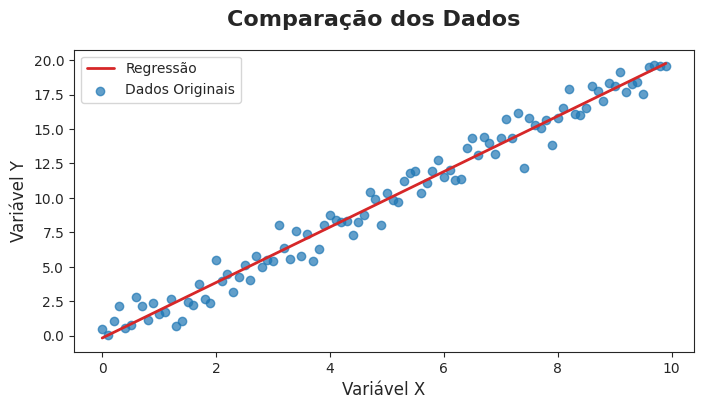

In [11]:
sns.set_style('ticks')
plt.figure(figsize = (8, 4), dpi = 100)
plt.scatter(X, Y, alpha = 0.7, label = 'Dados Originais')
plt.plot(X, Y_pred, color = 'tab:red', linewidth = 2, label = 'Regressão');
plt.xlabel('Variável X', size = 12)
plt.ylabel('Variável Y', size = 12)
plt.suptitle('Comparação dos Dados', fontweight='bold', size = 16)
plt.legend()

## Métricas de erros
Vamos visualizar os resultados com algumas métricas de análise de erros.

### R2

O R-quadrado é uma medida de quão próximos os dados estão da linha de regressão ajustada.

* Valor "0" indica que o modelo não explica nada da variabilidade dos dados de resposta ao redor de sua média.
* Valor "1" indica que o modelo explica toda a variabilidade dos dados de resposta ao redor de sua média.

In [12]:
from sklearn.metrics import r2_score
r_2 = r2_score(Y, Y_pred)
r_2

0.976455254882662

### RMSE (Root Mean Squared Error)
O RMSE tem é a diferença média de um valor e o seu parâmetro inicial. É destinado a compreender erros de previsão.

In [13]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(Y,Y_pred))
rmse

0.9027207284083368

### MAE (Mean Absolute Error)
O MAE mede a magnitude média dos erros de previsões, sem considerar sua direção.

In [14]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y,Y_pred)
mae

0.714962948096194

## Obtendo a equação da regressão
Como realizamos a regressão linear, iremos encontrar a seguinte equação:

##### $$\,Y = A\,X\,+\, B$$

### Coeficientes

Os coeficientes podem ser adquiridos ao utilizar o método ".params" no resultado da regressão.

Anteriormente criei a variável "coefs" para guardar os coeficientes. 

Utilizei: "coefs = model.params"

> O valor de A é o "coefs[1]"

> A constante B é o "coefs[0]"

In [15]:
A = coefs[1] # Coeficiente A
B = coefs[0] # Constante B
print("Coeficiente A = {}\nConstante B = {}".format(A, B))

Coeficiente A = 2.013932593269351
Constante B = -0.17281285407737923


Após definir os coeficientes, encontramos a seguinte equação:
> Lembre que o Python usa ponto no lugar de vírgula.

##### $$\,Y = (2.01)\,X\,+\, (-0.17)$$

***